In [17]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
%matplotlib notebook
import joblib
from palettable import cmocean as cb
from palettable import tableau as tb
from altair import *
from IPython.display import display,SVG,Image

In [2]:
file_list0=glob('instacart_2017_05_01/*')
file_list=[i.split('/')[1] for i in file_list0]

In [ ]:
# for item,path in zip(file_list,file_list0):
#     exec('{} = pd.read_csv(\'{}\')'.format(item[:-4],path))
#     #print(item[:-4],path)

In [3]:
file_list

['orders.csv',
 'departments.csv',
 'order_products__train.csv',
 'aisles.csv',
 'order_products__prior.csv',
 'products.csv']

In [4]:
all_data=joblib.load(filename='All_data_in_dict')

In [5]:
all_data.keys()

dict_keys(['orders', 'departments', 'order_products__train', 'aisles', 'order_products__prior', 'products'])

In [6]:
for i in all_data.keys():
    #exec('{} = pd.read_csv(\'{}\')'.format(item[:-4],path))
    exec('{} = all_data[\'{}\']'.format(i,i))

In [7]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
def get_hist(col_name):
    hist_hod=pd.DataFrame(col_name.value_counts())
    hist_hod.insert(0,'Name',hist_hod.index)
    hist_hod.reset_index(inplace=True,drop=True)
    return hist_hod
hist_hod=get_hist(orders.order_hour_of_day)
hist_hod.head()

,Name,order_hour_of_day
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999


In [11]:
day1=['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
hist_dow=get_hist(orders.order_dow)
hist_dow.insert(1,'Day of Week',day1)
hist_dow.head()

,Name,Day of Week,order_dow
0,0,Sun,600905
1,1,Mon,587478
2,2,Tue,467260
3,5,Wed,453368
4,6,Thur,448761


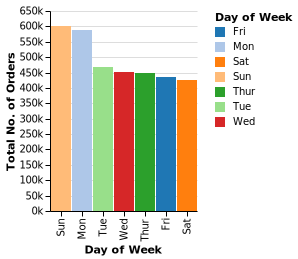

In [41]:
c=Chart(hist_dow).mark_bar().encode(
    x=X('Day of Week:O',sort=SortField(field='order_dow', order='descending'),
        axis=Axis(title='Day of Week')),
    y=Y('order_dow:Q',
        axis=Axis(title='Total No. of Orders')),
    color=Color('Day of Week:N', scale=Scale(range=tb.Tableau_20.hex_colors))
).configure_cell(
    width=600,height=200
)
c.savechart('Day_of_week.svg')
SVG('Day_of_week.svg')

<IPython.core.display.Javascript object>


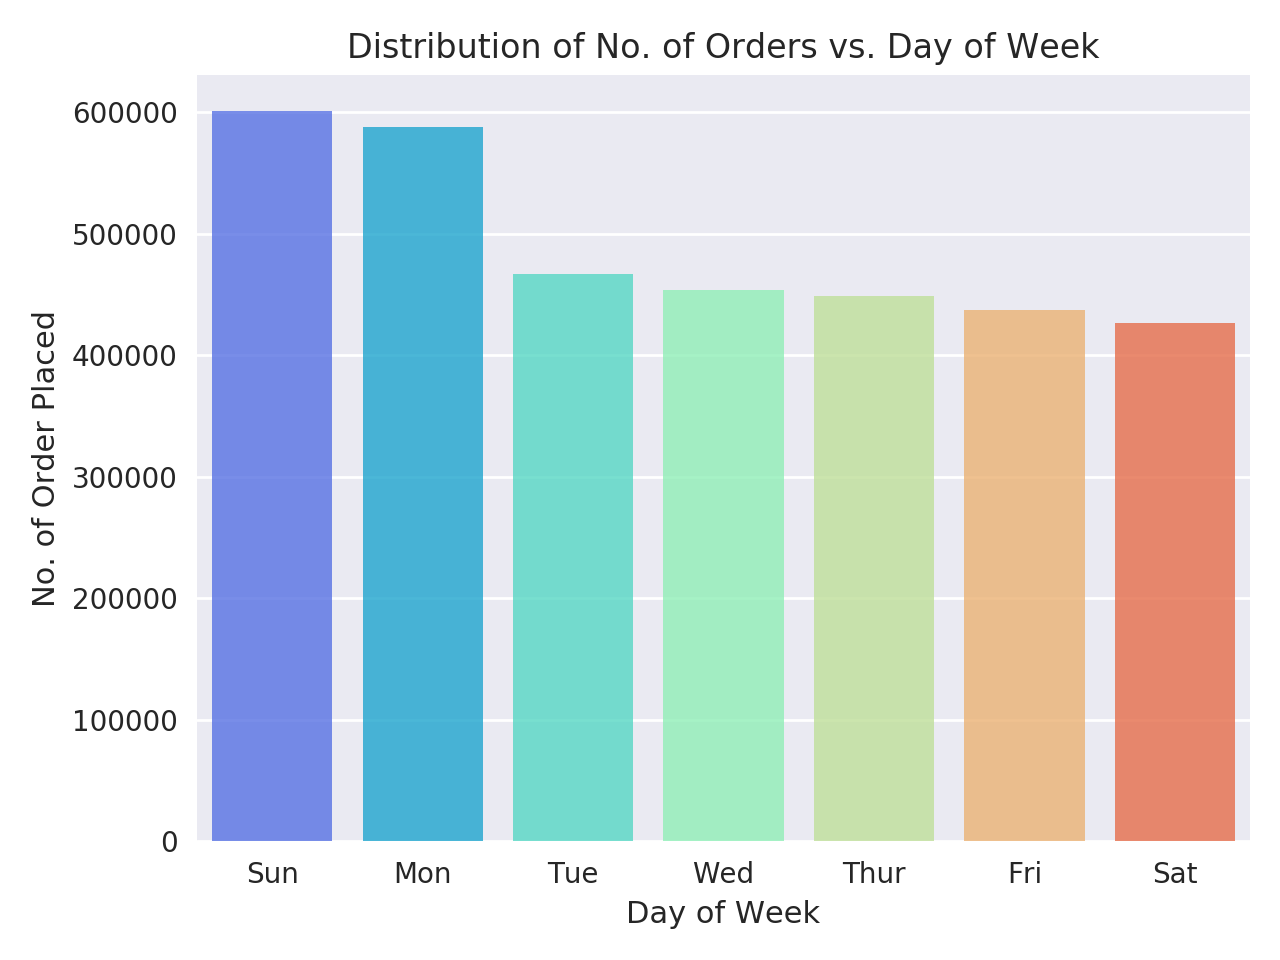

/home/theinhtay/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [47]:
plt.figure()
sns.barplot(day1,hist_dow.order_dow.values,palette='rainbow',alpha=0.8)
plt.title('Distribution of No. of Orders vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Order Placed')
plt.tight_layout()
plt.savefig('Distribution of No. of Orders vs. Day of Week.pdf',transparent=True)

In [42]:
hist_hod.head()

,Name,order_hour_of_day
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999


In [45]:
#!sudo apt install font-manager -y

In [92]:
%time
color_list=["#{:06x}".format(np.random.randint(0, 0xFFF0FF)) for i in np.arange(24)]


hist_hod.rename(columns={'Name': 'Hour of Day'},inplace=True)
c=Chart(hist_hod).mark_bar().encode(
    x=X('Hour of Day:O',#sort=SortField(field='order_dow', order='descending'),
        axis=Axis(title='Hour of Day')),
    y=Y('order_hour_of_day:Q',
        axis=Axis(title='Total No. of Orders')),
    color=Color('Hour of Day:N', scale=Scale(range=color_list))
).configure_cell(
    width=600,height=200
)
c.savechart('Hour_of_Day.svg')
#SVG('Hour_of_Day.svg')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


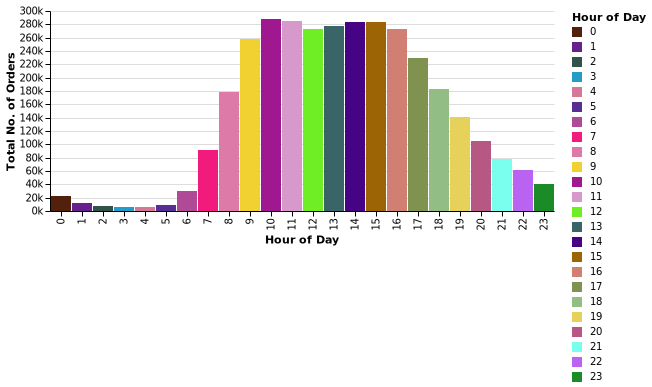

In [93]:
SVG('Hour_of_Day.svg')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


<IPython.core.display.Javascript object>


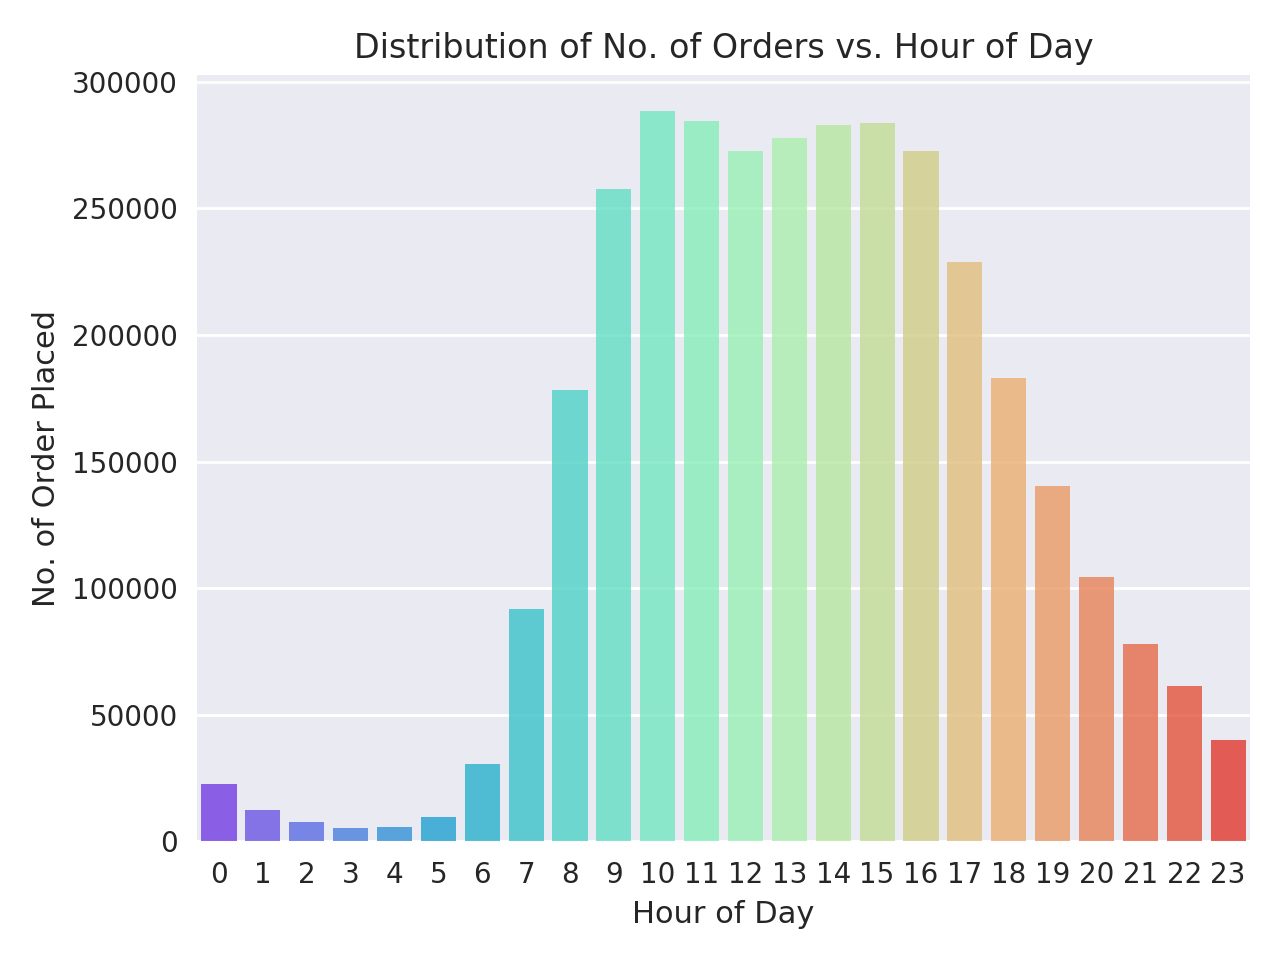

/home/theinhtay/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [91]:
%time 
plt.figure()
sns.barplot(hist_hod.ix[:,0].values,hist_hod.order_hour_of_day.values,palette='rainbow',alpha=0.8)
plt.title('Distribution of No. of Orders vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Order Placed')
plt.tight_layout()
plt.savefig('Distribution of No. of Orders vs. Hour of Day.pdf',transparent=True)

In [17]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
file_list

['orders.csv',
 'departments.csv',
 'order_products__train.csv',
 'aisles.csv',
 'order_products__prior.csv',
 'products.csv']

In [19]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
hist_product=get_hist(order_products__train.product_id)

In [20]:
hist_product.head()

,Name,product_id
0,24852,18726
1,13176,15480
2,21137,10894
3,21903,9784
4,47626,8135


In [21]:
# plt.figure()
# g=sns.barplot(hist_product.Name.values[:10],hist_product.product_id.values[:10])
# plt.xticks(rotation=90)
# plt.tight_layout()

In [22]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
top15_product=[]
for i in hist_product.Name.values[:15]:
    top15_product.extend(products[products.ix[:,'product_id'] == i]['product_name'].values)
    

In [24]:
top15_product

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Large Lemon',
 'Organic Avocado',
 'Organic Hass Avocado',
 'Strawberries',
 'Limes',
 'Organic Raspberries',
 'Organic Blueberries',
 'Organic Whole Milk',
 'Organic Cucumber',
 'Organic Zucchini',
 'Organic Yellow Onion']

In [25]:
hist_product15=pd.DataFrame.copy(hist_product.ix[:14,:])
print(hist_product15.head())
hist_product15['Product_Name']=top15_product
print(hist_product15.head())

    Name  product_id
0  24852       18726
1  13176       15480
2  21137       10894
3  21903        9784
4  47626        8135
    Name  product_id            Product_Name
0  24852       18726                  Banana
1  13176       15480  Bag of Organic Bananas
2  21137       10894    Organic Strawberries
3  21903        9784    Organic Baby Spinach
4  47626        8135             Large Lemon


In [29]:
len(hist_product.product_id.values[:14])

14

<IPython.core.display.Javascript object>


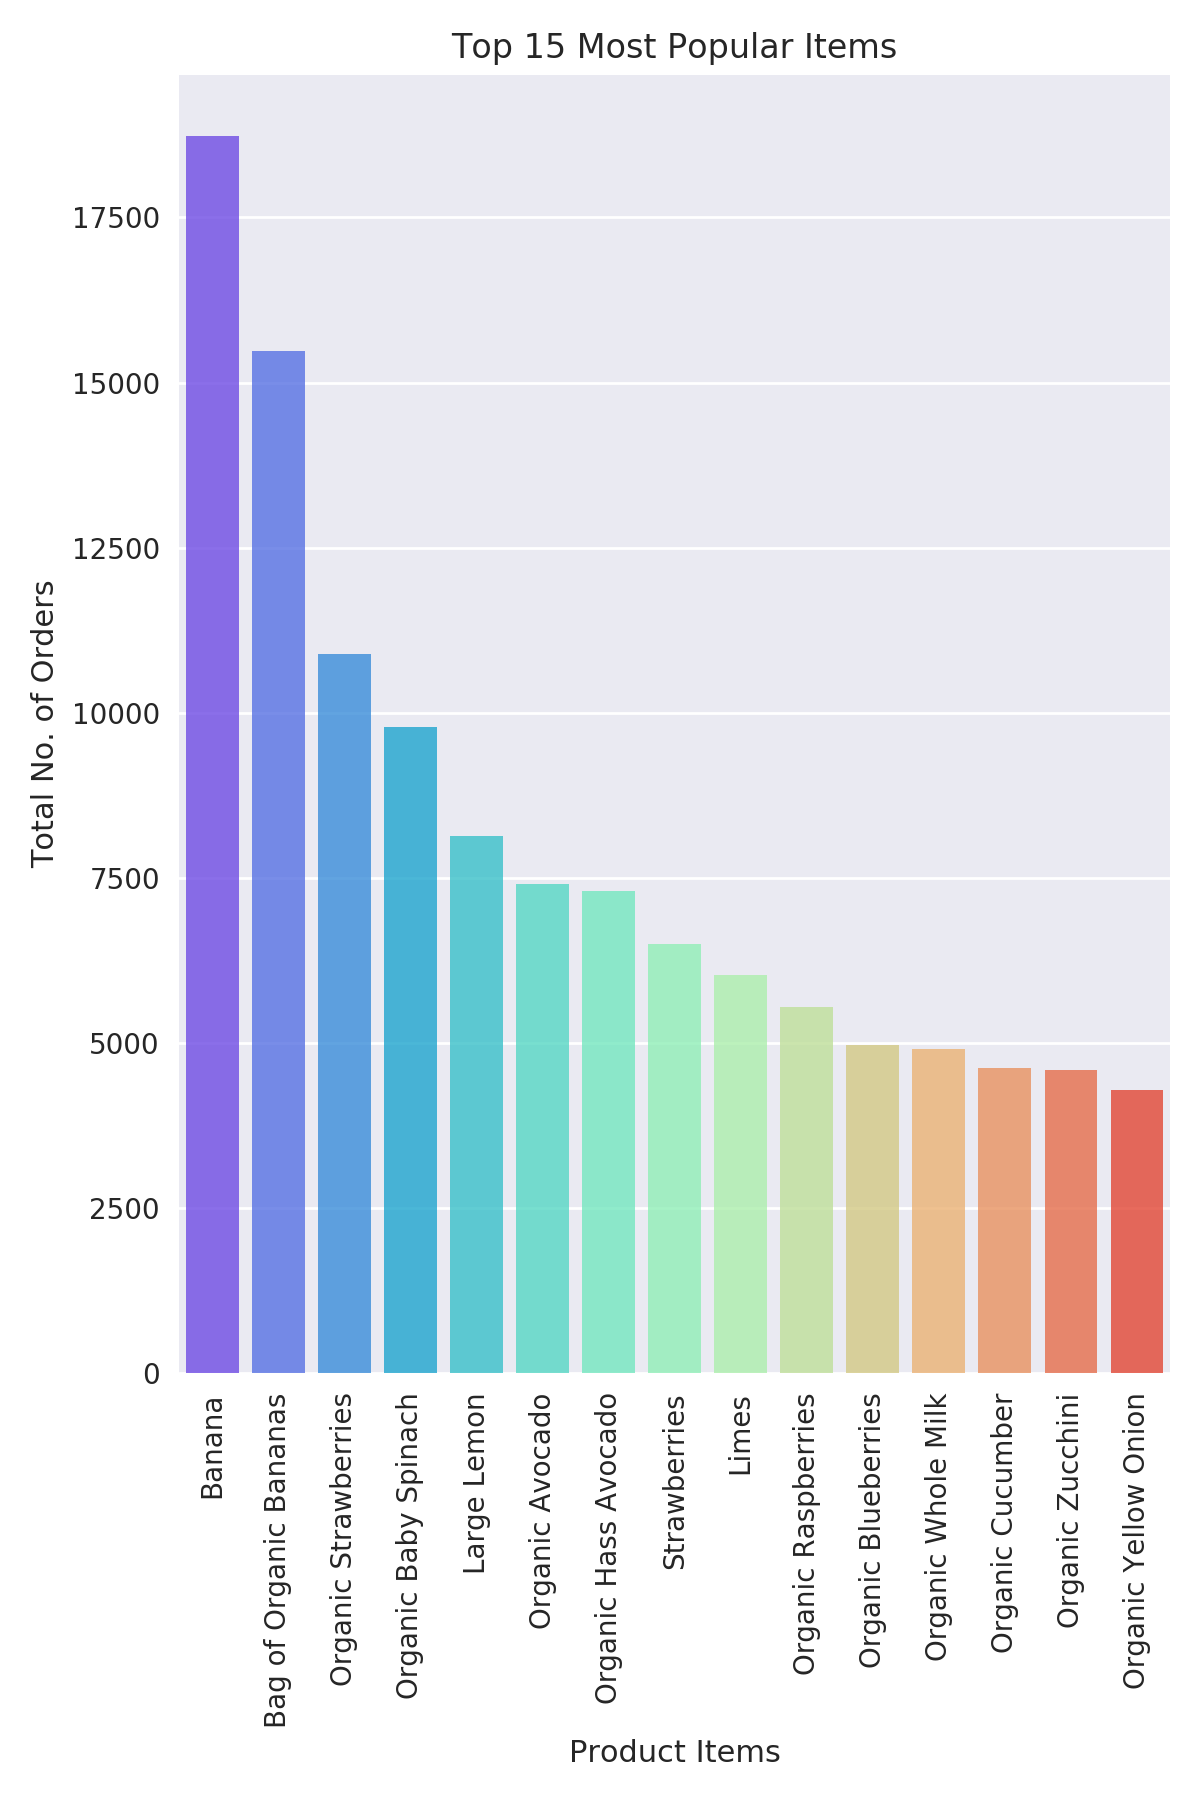

/home/theinhtay/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [53]:
plt.figure(figsize=(6,9))
sns.set_palette('gray')
g=sns.barplot(top15_product,hist_product.product_id.values[:15],palette='rainbow',alpha=0.8)
#sns.color_palette("Blues",3)
plt.title('Top 15 Most Popular Items')
plt.xlabel('Product Items')
plt.ylabel('Total No. of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 15 Most Popular Items.pdf',transparent=True)

<IPython.core.display.Javascript object>


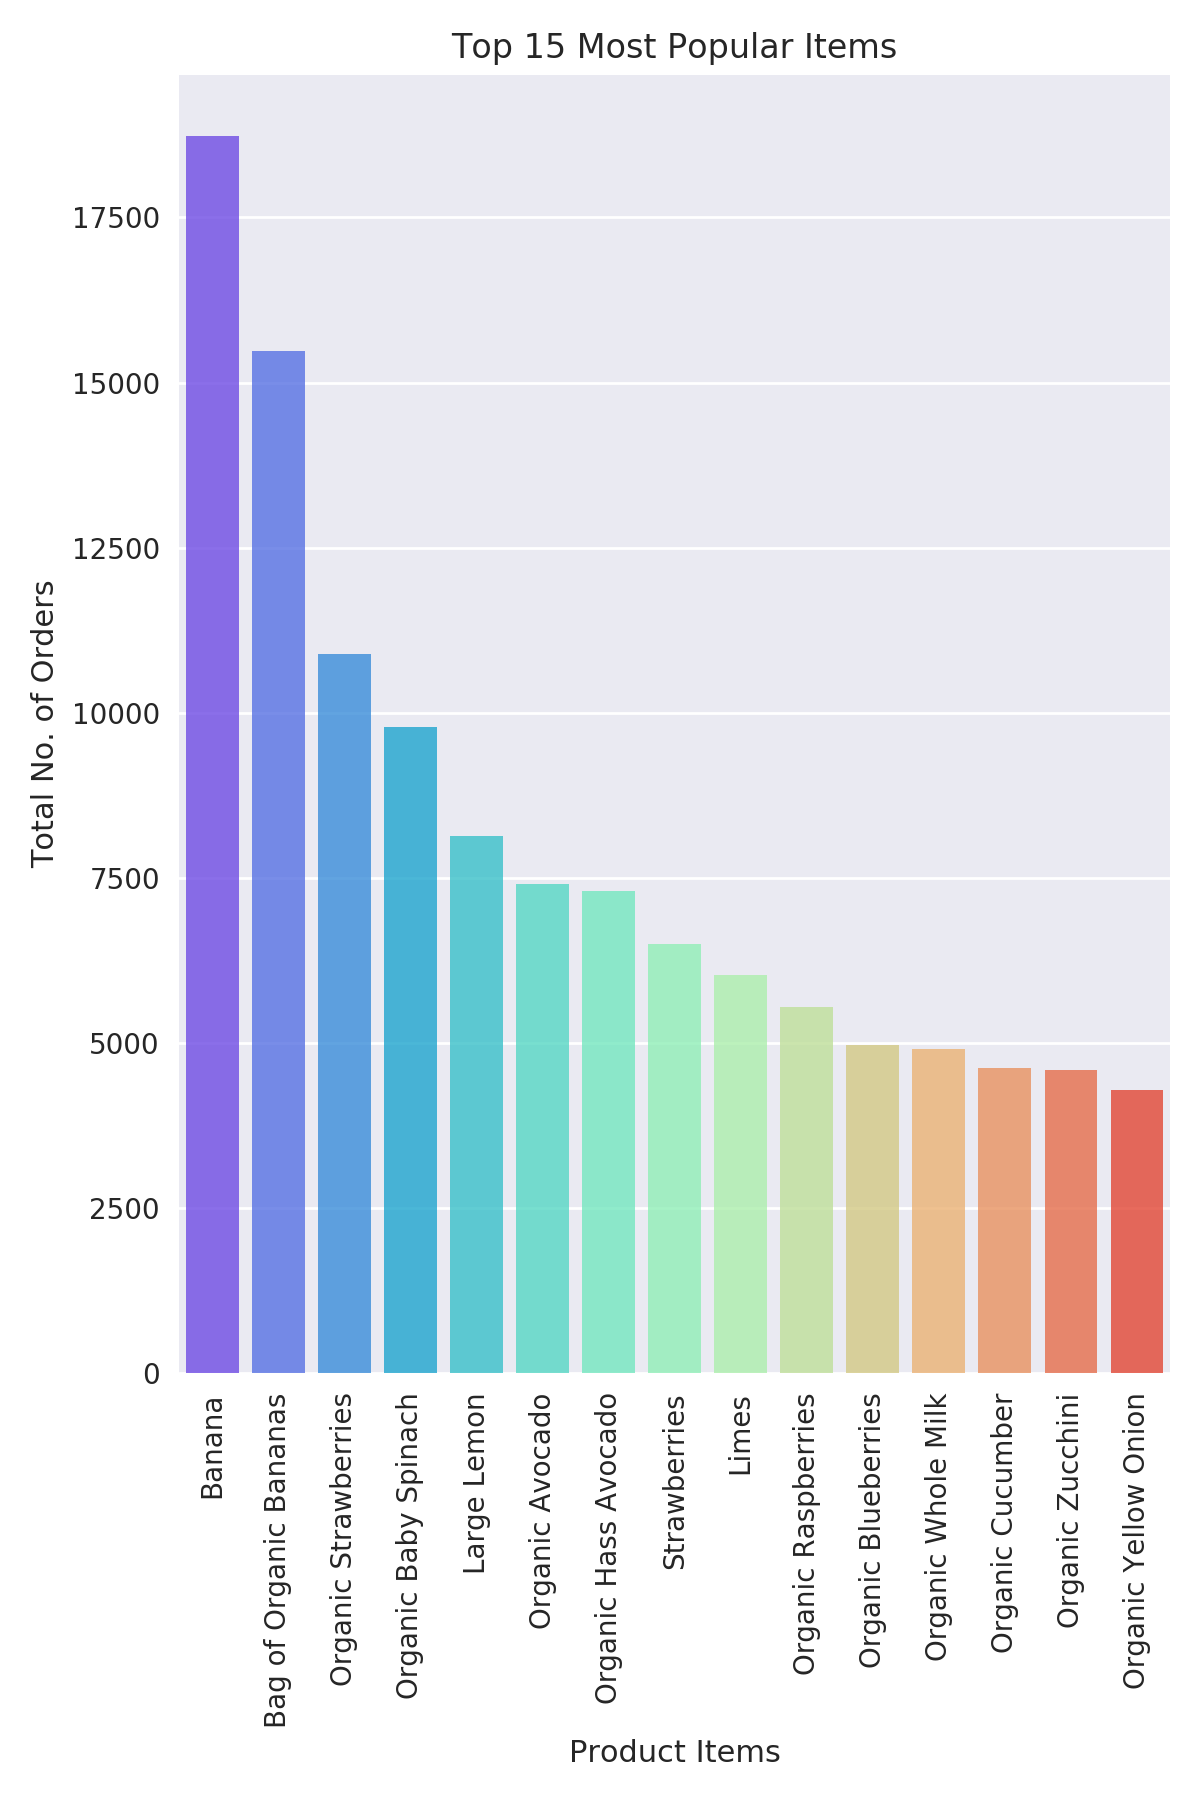

/home/theinhtay/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [53]:

plt.figure(figsize=(6,9))
sns.set_palette('gray')
g=sns.barplot(top15_product,hist_product.product_id.values[:15],palette='rainbow',alpha=0.8)
#sns.color_palette("Blues",3)
plt.title('Top 15 Most Popular Items')
plt.xlabel('Product Items')
plt.ylabel('Total No. of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 15 Most Popular Items.pdf',transparent=True)

In [49]:
from altair import *


In [44]:
# data_list={}
# for item in file_list:
#     exec('data_list[\'{}\'] = {}'.format(item[:-4],item[:-4]))

In [47]:
# data_list.keys()

dict_keys(['orders', 'departments', 'order_products__train', 'aisles', 'order_products__prior', 'products'])

In [49]:
# joblib.dump(data_list,'All_data_in_dict')

['All_data_in_dict']

In [ ]:
# exec('{} = pd.read_csv(\'{}\')'.format(item[:-4],path))

In [57]:
hist_product15

,Name,product_id,Product_Name
0,24852,18726,Banana
1,13176,15480,Bag of Organic Bananas
2,21137,10894,Organic Strawberries
3,21903,9784,Organic Baby Spinach
4,47626,8135,Large Lemon
5,47766,7409,Organic Avocado
6,47209,7293,Organic Hass Avocado
7,16797,6494,Strawberries
8,26209,6033,Limes
9,27966,5546,Organic Raspberries


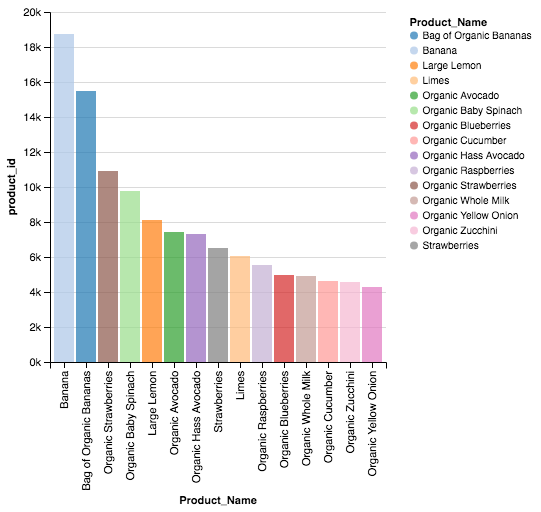

In [72]:
Chart(hist_product15).mark_bar().encode(
    Y('product_id'),
    X('Product_Name',sort=SortField(field='product_id', order='descending')),
    color=Color('Product_Name:N', scale=Scale(range=tb.Tableau_20.hex_colors))
)
#chart.savechart('Top15.svg')

In [69]:
from IPython.display import display,SVG,Image

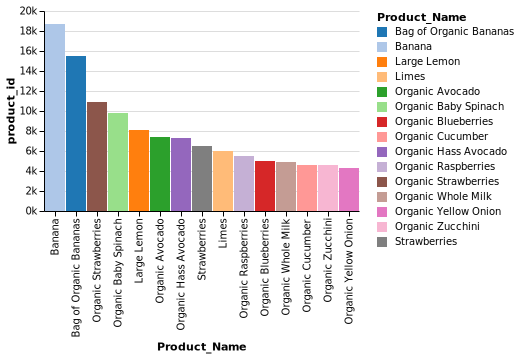

In [70]:
SVG('Top15.svg')

['#92337b',
 '#3ecd5c',
 '#397e8c',
 '#931f7e',
 '#0ba7bd',
 '#657c2f',
 '#72f63d',
 '#96491f',
 '#1e14f4',
 '#46fdc8',
 '#d5db1a',
 '#d1aacf',
 '#41eec9',
 '#f6fd64',
 '#bb61c4',
 '#0221fd',
 '#a0ab10',
 '#76a32c',
 '#07ce46',
 '#e79ebd',
 '#f8dce7',
 '#912299',
 '#2a7bbe',
 '#e2b1eb']

['#5ea5f0',
 '#27ab38',
 '#c3e852',
 '#9f5120',
 '#a97916',
 '#1032b6',
 '#73b86a',
 '#6566cf',
 '#e5de33',
 '#ddd97f',
 '#d61975',
 '#46d417',
 '#b2968e',
 '#029a4f',
 '#1cc45a',
 '#0103b9',
 '#175839',
 '#5cbac9',
 '#c2c6d7',
 '#7e5c5d',
 '#8b5f28',
 '#c3c87f',
 '#830d77',
 '#11d26f']

In [70]:
"#%06x".format(random.randint(0, 0xFFFFFF))

'#%06x'

In [73]:
"#%06x" % random.randint(0, 0xFFFFFF)

'#7ebbc7'